# Function Calling Variations

HouseKeeping

In [1]:
def afunction(arg1:int = 0, arg2:str = "hello", **kwargs)->int:
    ''' this is a function definition
        arg1 (int): an exemplary yet modest argument
        arg2 (str): another nice argument
        **kwargs : the rest of the rabble 

        returns arg1 incremented by one
    '''
    return(arg + 1)

In [2]:
print(afunction.__name__)
print(afunction.__doc__)

afunction
 this is a function definition
        arg1 (int): an exemplary yet modest argument
        arg2 (str): another nice argument
        **kwargs : the rest of the rabble 

        returns arg1 incremented by one
    


In [3]:
import inspect
print(inspect.signature(afunction))

(arg1: int = 0, arg2: str = 'hello', **kwargs) -> int


In [4]:
import inspect
def build_raven_prompt(function_list, user_query):
    raven_prompt = ""
    for function in function_list:
        signature = inspect.signature(function)
        docstring = function.__doc__
        prompt = \
f'''
Function:
def {function.__name__}{signature}
    """
    {docstring.strip()}
    """
    
'''
        raven_prompt += prompt
        
    raven_prompt += f"User Query: {user_query}<human_end>"
    return raven_prompt


In [5]:
print( build_raven_prompt([afunction], "a query"))


Function:
def afunction(arg1: int = 0, arg2: str = 'hello', **kwargs) -> int
    """
    this is a function definition
        arg1 (int): an exemplary yet modest argument
        arg2 (str): another nice argument
        **kwargs : the rest of the rabble 

        returns arg1 incremented by one
    """
    
User Query: a query<human_end>


##### Parallel Calls

In [6]:
from utils import draw_clown_face

raven_msg = "Hey, can you build me two clowns." \
"The first clown should be red faced, with a blue nose" \
"and a mouth from 0 to 180 degrees. The mouth should be black." \
"The second clown should have a blue face and a green nose" \
"and a red mouth that's 180 to 360 degrees."

In [7]:
raven_prompt = build_raven_prompt([draw_clown_face], raven_msg)

print (raven_prompt)


Function:
def draw_clown_face(face_color='yellow', eye_color='black', nose_color='red', eye_size=0.05, mouth_size=(0.3, 0.1), mouth_color='black', eye_offset=(0.15, 0.15), mouth_theta=(200, 340))
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.
    - eye_size (float): Radius of the clown's eyes. Default is 0.05.
    - mouth_size (tuple): Width and height of the clown's mouth arc. Default is (0.3, 0.1).
    - eye_offset (tuple): Horizontal and vertical offset for the eyes from the center. Default is (0.15, 0.15).
    - mouth_theta (tuple): Starting and ending angles (in degrees) of the mouth arc. Default is (200, 340).

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, a

draw_clown_face(face_color='red', nose_color='blue', mouth_color='black', mouth_theta=(0, 180)); draw_clown_face(face_color='blue', nose_color='green', mouth_color='red', mouth_theta=(180, 360));


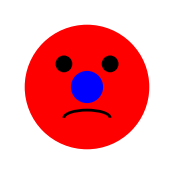

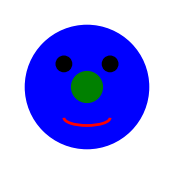

In [8]:
from utils import query_raven
raven_call = query_raven(raven_prompt)
print (raven_call)
exec(raven_call)

##### Using Multiple Functions

In [9]:
# Prompts:
from utils import draw_clown_face, draw_tie
raven_msg = "Hey draw a tie?"
raven_prompt = build_raven_prompt\
    ([draw_clown_face, draw_tie], raven_msg)

In [10]:
print(raven_prompt)


Function:
def draw_clown_face(face_color='yellow', eye_color='black', nose_color='red', eye_size=0.05, mouth_size=(0.3, 0.1), mouth_color='black', eye_offset=(0.15, 0.15), mouth_theta=(200, 340))
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.
    - eye_size (float): Radius of the clown's eyes. Default is 0.05.
    - mouth_size (tuple): Width and height of the clown's mouth arc. Default is (0.3, 0.1).
    - eye_offset (tuple): Horizontal and vertical offset for the eyes from the center. Default is (0.15, 0.15).
    - mouth_theta (tuple): Starting and ending angles (in degrees) of the mouth arc. Default is (200, 340).

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, a